# Assignment 4

Name : Ghanashyam Patil  
Roll No : 31162  
Subject : DSBDAL

Problem Statement :  
Perform the following operations using Python
1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them.   
    a)min max normalization  
    b)z-score normalization   
    c)Box plot 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('../Databases/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
#storing all the columns having numeric datatype
numeric_cols = df.select_dtypes(include='number')
numeric_cols

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Min-Max normalization

Outliers in math score:
17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64


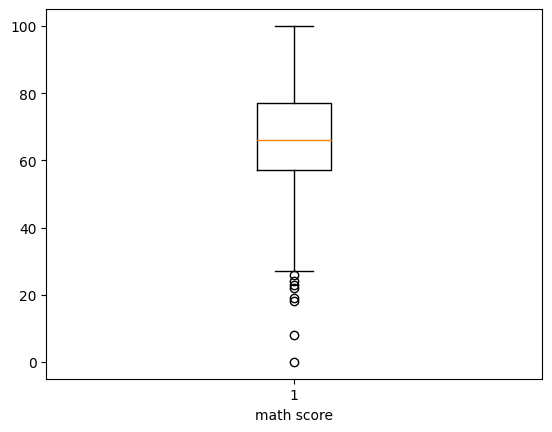

Outliers in reading score:
59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64


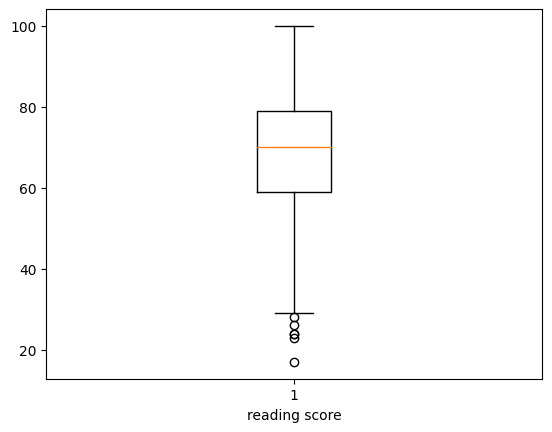

Outliers in writing score:
59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64


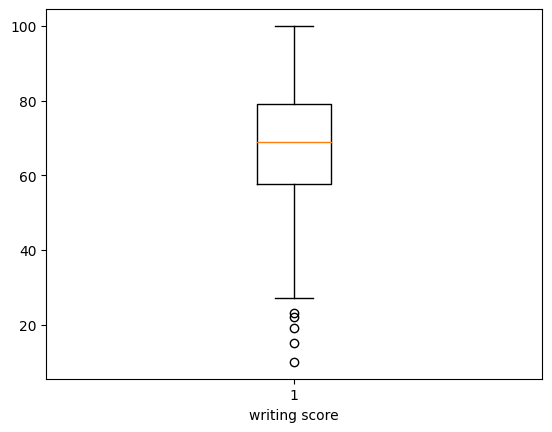

In [16]:
for var in numeric_cols:
    column_data = df[var]
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in {var}:")
        print(outliers)

        # a) Min-Max normalization
        normalized_data = (column_data - column_data.min()) / (column_data.max() - column_data.min())
        # normalized_data will be in the range [0, 1]

        # c) Box plot
        plt.figure()
        plt.boxplot(column_data)
        plt.xlabel(var)
        plt.show()

# Z-score normalization

Outliers in math score:
17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64


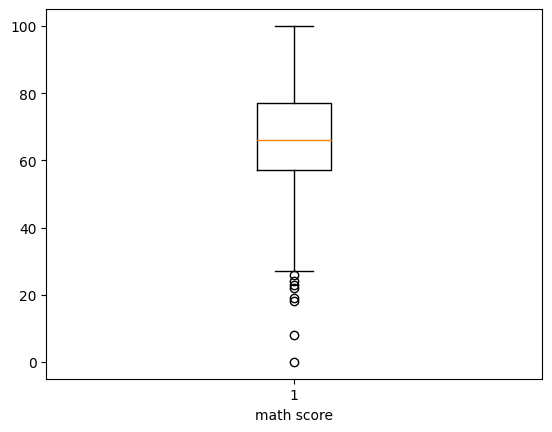

Outliers in reading score:
59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64


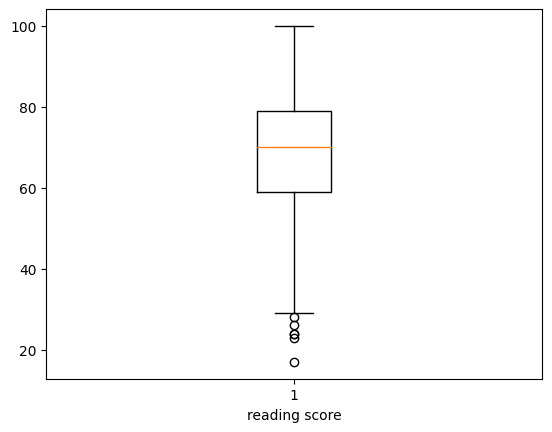

Outliers in writing score:
59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64


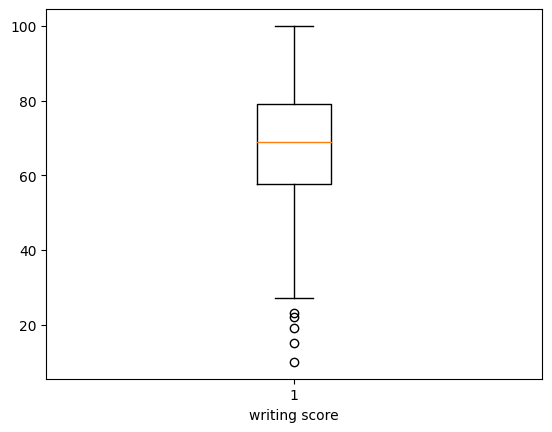

In [17]:
for var in numeric_cols:
    column_data = df[var]
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in {var}:")
        print(outliers)
        
        # b) Z-score normalization
        z_score = (column_data - column_data.mean()) / column_data.std()
        # z_score will have mean 0 and standard deviation 1

        # c) Box plot
        plt.figure()
        plt.boxplot(column_data)
        plt.xlabel(var)
        plt.show()